# Prepare Environment

In [9]:
import numpy as np
import math, copy
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 18}
matplotlib.rc('font', **font)

np.set_printoptions(precision=3)  # reduced display precision on numpy arrays

# Dataset

The following is the dummy dataset generated by [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) from `sklearn.datasets`. This function is typically used to generate isotropic Gaussian blobs for clustering. The **isotropic** refers to the fact that the diagonal covariance matrix (i.e., all features are independent) [[1](https://stats.stackexchange.com/questions/534543/what-is-the-meaning-of-isotropic-gaussian-blobs-which-are-generated-by-sklearn)] [[2](https://math.stackexchange.com/questions/1991961/gaussian-distribution-is-isotropic)]).

In this dataset, there are 500 normal and 20 abnormal examples.

In [10]:
from sklearn.datasets import make_blobs

X_normal, y_normal = make_blobs(
    n_samples=500,n_features=2,centers=1,cluster_std=1.50,random_state=42)
X_abnormal, y_abnormal = make_blobs(
    n_samples=20,n_features=2,centers=1,cluster_std=5,random_state=42)
y_abnormal = np.ones_like(y_abnormal, dtype=int)
X = np.vstack([X_normal, X_abnormal])
y = np.hstack([y_normal, y_abnormal])

Let's plot the data.

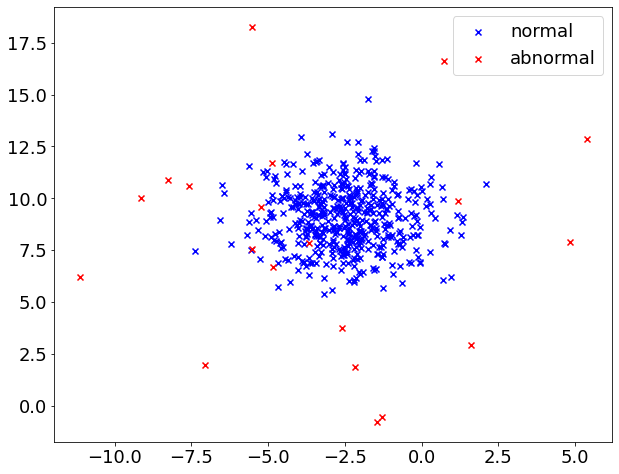

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(X[y==0,0], X[y==0,1], c='b', marker="x", label='normal')
plt.scatter(X[y==1,0], X[y==1,1], c='r', marker="x", label='abnormal')
plt.legend()
plt.show()
plt.close('all')

## Split Dataset

* **Training set**: 80% from normal
* **Validation set**: 10% from normal + 50% from anomalous
* **Test set**: 10% from normal + 50 from anomalous



In [12]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
# X_train = 
# y_train = 
# X_valid =
# y_valid = 
# X_test = 
# y_test = 
X_train, X_, y_train, y_ = train_test_split(X_normal, y_normal,test_size=0.20, random_state=42)# YOUR CODE HERE
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)# YOUR CODE HERE
X_valid,X_t,y_valid,y_t = train_test_split(X_abnormal,y_abnormal,test_size =0.50,random_state=42)
X_valid = np.vstack([X_cv, X_valid])
y_valid = np.hstack([y_cv, y_valid])
X_test =  np.vstack([X_test,X_t])
y_test =  np.hstack([y_test,y_t])


print(f"Training set: {X_train.shape} {y_train.shape} n_abnormal={np.sum(y_train)}")
print(f"Validation set: {X_valid.shape} {y_valid.shape} n_abnormal={np.sum(y_valid)}")
print(f"Test set: {X_test.shape} {y_test.shape} n_abnormal={np.sum(y_test)}")

Training set: (400, 2) (400,) n_abnormal=0
Validation set: (60, 2) (60,) n_abnormal=10
Test set: (60, 2) (60,) n_abnormal=10


# Gaussian distribution

To perform anomaly detection, you will first need to fit a model to the data’s distribution.

* Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
of the features $x_i$. 

* Recall that the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ controls the variance.
   
* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).

Please complete the `estimate_gaussian` function below to calculate `mu` (mean for each feature in `X`) and `var` (variance for each feature in `X`).

You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [13]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape

    # YOUR CODE HERE
  
     
    mu = np.sum(X, axis=0)/m
    var = np.sum((X-mu)**2 , axis=0)/m
    return mu, var

The following code is used to test your `estimate_gaussian` function.

In [14]:
def estimate_gaussian_test(target):
    np.random.seed(273)
    
    X = np.array([[1, 1, 1], 
                  [2, 2, 2], 
                  [3, 3, 3]]).T
    
    mu, var = target(X)
    
    assert type(mu) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(mu)}"
    assert type(var) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(var)}"
    
    assert mu.shape == (X.shape[1],), f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {mu.shape}"
    assert type(var) == np.ndarray, f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {var.shape}"
    
    assert np.allclose(mu, [1., 2., 3.]), f"Wrong value for mu. Expected: {[1, 2, 3]} got: {mu}"
    assert np.allclose(var, [0., 0., 0.]), f"Wrong value for mu. Expected: {[0, 0, 0]} got: {var}"
    
    X = np.array([[1, 2, 3], 
                  [2, 4, 6], 
                  [3, 6, 9]]).T
    
    mu, var = target(X)
    
    assert type(mu) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(mu)}"
    assert type(var) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(var)}"
    
    assert mu.shape == (X.shape[1],), f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {mu.shape}"
    assert type(var) == np.ndarray, f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {var.shape}"
    
    assert np.allclose(mu, [2., 4., 6.]), f"Wrong value for mu. Expected: {[2., 4., 6.]} got: {mu}"
    assert np.allclose(var, [2. / 3, 8. / 3., 18. / 3.]), f"Wrong value for mu. Expected: {[2. / 3, 8. / 3., 18. / 3.]} got: {var}"
    
    
    m = 500
    X = np.array([np.random.normal(0, 1, m), 
                  np.random.normal(1, 2, m), 
                  np.random.normal(3, 1.5, m)]).T
    
    mu, var = target(X)
    
    assert type(mu) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(mu)}"
    assert type(var) == np.ndarray, f"Wrong type for mu. Expected: {np.ndarray} got: {type(var)}"
    
    assert mu.shape == (X.shape[1],), f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {mu.shape}"
    assert type(var) == np.ndarray, f"Wrong shape for mu. Expected: {(X.shape[1],)} got: {var.shape}"
    
    assert np.allclose(mu, [0., 1., 3.], atol=0.2), f"Wrong value for mu. Expected: {[0, 1, 3]} got: {mu}"
    assert np.allclose(var, np.square([1., 2., 1.5]), atol=0.2), f"Wrong value for mu. Expected: {np.square([1., 2., 1.5])} got: {var}"
    
    print("All tests passed!")

estimate_gaussian_test(estimate_gaussian)

All tests passed!


Let's estimate the mean and variance of the training set.

In [15]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [-2.491  9.121]
Variance of each feature: [2.152 2.288]


Expected outputs:
```
Mean of each feature: [-2.491  9.121]
Variance of each feature: [2.152 2.288]
```
Note: your numbers may vary depending on the randomness of the train/valid/test split. If you want the same number, please use `random_seed=42`.

## Isotropic Multivariate Gaussian

The following is the function to determine $p(x)$ for a given `mu` (a vector of $\mu_j$) and `var` (a vector of $\sigma_j^2$). This function assumes that *all features are independent* (i.e., assume the diagonal covariance matrix).

It should be emphasized that $p(x)$ represents the probability of $x$ being seen in the dataset, where
* $p(x)$ is high --> normal
* $p(x)$ is low --> abnormal or anomalous

In [16]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix is used).

    Ref: https://math.stackexchange.com/questions/1991961/gaussian-distribution-is-isotropic
    """
    
    k = len(mu)
    
    # Convert to covariance matrix
    if var.ndim == 1:
        # This assume that each feature (colume) are independent
        var = np.diag(var)
    
    # Equation can be found here
    # https://datascienceplus.com/understanding-the-covariance-matrix/
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

Let's compute the $p(x)$ for the training set and visualize the contour.

In [17]:
# The p(x) at each data point (row)
p_train = multivariate_gaussian(X_train, mu, var)

In [18]:
def visualize_fit_gaussian(X, mu, var, p):
    """
    This visualization shows you the 
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """

    X1_min, X1_max = np.min(X[:,0]), np.max(X[:,0])
    X2_min, X2_max = np.min(X[:,1]), np.max(X[:,1])
    X1_std, X2_std = np.std(X[:,0]), np.std(X[:,1])
    X1, X2 = np.meshgrid(
        np.linspace(X1_min-X1_std, X1_max+X1_std, 100), 
        np.linspace(X2_min-X2_std, X2_max+X2_std, 100))
    # probability
    Z = multivariate_gaussian(
        np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    # reshape to visualize from x1, x2 generated from meshgrid
    Z = Z.reshape(X1.shape)

    fig, ax = plt.subplots(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1], c=p, marker='x')

    contour_lvs = 10**(np.arange(-20., 1, 3))
    if np.sum(np.isinf(Z)) == 0:
        plt.contour(
            X1, X2, Z, 
            levels=contour_lvs, 
            linewidths=1)
    print(f'Contour levels: {contour_lvs}')

Contour levels: [1.e-20 1.e-17 1.e-14 1.e-11 1.e-08 1.e-05 1.e-02]


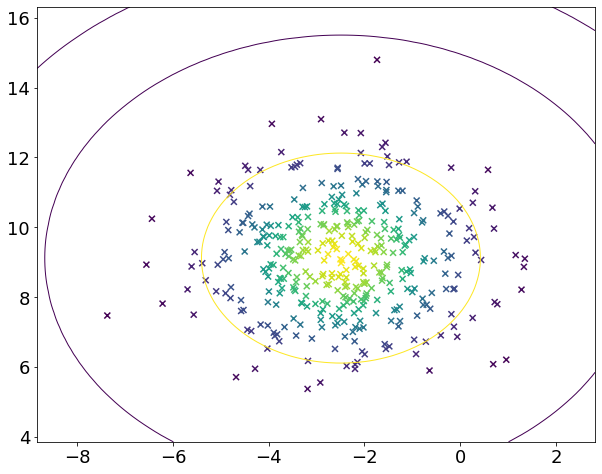

In [19]:
# Visualize p over data
visualize_fit_gaussian(X_train, mu, var, p_train)

# Select the best epsilon on the validation set

Now that you have estimated the Gaussian parameters, you can investigate which examples have a very high probability given this distribution and which examples have a very low probability.

* The low probability examples are more likely to be the anomalies in our dataset. 
* One way to determine which examples are anomalies is to select a threshold based on a validation set. 

In this section, you will complete the code in `select_threshold` to select the threshold $\varepsilon$ using the $F_1$ score on a validation set.

* For this, we will use a validation set
$\{(x_{\rm valid}^{(1)}, y_{\rm valid}^{(1)}),\ldots, (x_{\rm valid}^{(m_{\rm valid})}, y_{\rm valid}^{(m_{\rm valid})})\}$, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example. 
* For each validation example, we will compute $p(x_{\rm valid}^{(i)})$. The vector of all of these probabilities $p(x_{\rm valid}^{(1)}), \ldots, p(x_{\rm valid}^{(m_{\rm valid)}})$ is passed to `select_threshold` in the vector `p_val`. 
* The corresponding labels $y_{\rm valid}^{(1)}, \ldots, y_{\rm valid}^{(m_{\rm valid)}}$ is passed to the same function in the vector `y_val`.

In particular, you need to implement code to calculate F1 score from choosing `epsilon` as the threshold and place the value in `F1`.
* Recall that if an example $x$ has a low probability $p(x) < \varepsilon$, then it is classified as an anomaly. 
        
* Then, you can compute precision and recall by: 
   $$\begin{aligned}
   \text{precision}&=&\frac{tp}{tp+fp}\\
   \text{recall}&=&\frac{tp}{tp+fn},
   \end{aligned}$$ where
  * $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
  * $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
  * $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

* The $F_1$ score is computed using precision and recall as follows:

    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$

> Note that when computing precision and reall, you need to write the code to cover the case where the denominator is equal to 0, as it is not possible to divide with 0. In particular, when the denominator is 0, assign `math.nan` to the metric.

In [20]:
from math import nan

def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):    
        # YOUR CODE HERE
        y_preds = p_val < epsilon
        tp = np.sum((y_preds==1)&(y_val==1))
        fn = np.sum((y_preds==0)&(y_val==1))
        fp = np.sum((y_preds==1)&(y_val==0))
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        F1 = (2*prec*rec)/(prec+rec)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

The following code is used to test your `select_threshold` function.

In [21]:
import random

def select_threshold_test(target):
    p_val = np.array([i / 100 for i in range(30)])
    y_val = np.array([1] * 5 + [0] * 25)
    
    best_epsilon, best_F1 = target(y_val, p_val)
    assert np.isclose(best_epsilon, 0.04, atol=0.3 / 1000), f"Wrong best_epsilon. Expected: {0.04} got: {best_epsilon}"
    assert best_F1 == 1, f"Wrong best_F1. Expected: 1 got: {best_F1}"
    
    y_val = np.array([1] * 5 + [0] * 25)
    y_val[2] = 0 # Introduce noise
    best_epsilon, best_F1 = target(y_val, p_val)
    assert np.isclose(best_epsilon, 0.04, atol=0.3 / 1000), f"Wrong best_epsilon. Expected: {0.04} got: {best_epsilon}"
    assert np.isclose(best_F1, 0.8888888), f"Wrong best_F1. Expected: 0.8888888 got: {best_F1}"
    
    p_val = np.array([i / 1000 for i in range(50)])
    y_val = np.array([1] * 8 + [0] * 42)
    y_val[5] = 0
    index = [*range(50)]
    random.shuffle(index)
    p_val = p_val[index]
    y_val = y_val[index]

    best_epsilon, best_F1 = target(y_val, p_val)
    assert np.isclose(best_epsilon, 0.007, atol=0.05 / 1000), f"Wrong best_epsilon. Expected: {0.0070070} got: {best_epsilon}"
    assert np.isclose(best_F1, 0.933333333), f"Wrong best_F1. Expected: 0.933333333 got: {best_F1}"
    print("All tests passed!")

select_threshold_test(select_threshold)

All tests passed!


<ipython-input-20-141c1c9c2ca3>:30: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


In [22]:
p_valid = multivariate_gaussian(X_valid, mu, var)
epsilon, F1 = select_threshold(y_valid, p_valid)

print('Best epsilon found using validation set: %e' % epsilon)
print('Best F1 on validation Set: %f' % F1)

Best epsilon found using validation set: 1.414010e-04
Best F1 on validation Set: 0.823529


<ipython-input-20-141c1c9c2ca3>:30: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


Expected outputs:
```
Best epsilon found using validation set: 1.414010e-04
Best F1 on validation Set: 0.823529
```
Note: your numbers may vary depending on the randomness of the train/valid/test split. If you want the same number, please use `random_seed=42`.

# Determine Anomaly in Test Set

Now you should have all of the pieces: `mu`, `var` and `epsilon` to determine the anomalies in the test set. Please complete the code below to determine which examples are anomalous.

In [23]:
# Calculate the p(x) of test set
p_test = multivariate_gaussian(X_test,mu,var)# YOUR CODE HERE

# Predict the anomalies (or outliers)
y_preds_test = epsilon > p_test # YOUR CODE HERE

Please complete the code below to compute the accuracy, precision, recall and F1-score.

In [24]:
# YOUR CODE HERE
# acc =
# prec = 
# rec = 
# F1 = 
acc = np.mean(y_preds_test == y_test)
tp = np.sum((y_preds_test == 1) & (y_test == 1))
fp = np.sum((y_preds_test == 1) & (y_test == 0))
fn = np.sum((y_preds_test == 0) & (y_test == 1))

        
prec = tp/(tp+fp)
rec = tp/(tp+fn)
F1 = 2*prec*rec/(prec+rec)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {F1:.4f}")

Accuracy: 0.9500
Precision: 1.0000
Recall: 0.7000
F1-Score: 0.8235


Expected outputs:
```
Accuracy: 0.9500
Precision: 1.0000
Recall: 0.7000
F1-Score: 0.8235
```

Let's visualize the predicted anomalies.

In [25]:
def visualize_preds(X, y, y_preds):
    # Visualize p over data
    fig, ax = plt.subplots(figsize=(10,8))
    plt.scatter(X[y==0,0], X[y==0,1], c='b', marker="x", label='normal')
    plt.scatter(X[y==1,0], X[y==1,1], c='r', marker="x", label='abnormal')
    # Draw a red circle around the predicted outliers
    plt.plot(
        X[y_preds, 0], X[y_preds, 1], 'ro',
        markersize=10, markerfacecolor='none', markeredgewidth=2,
        label='pred')
    plt.legend()

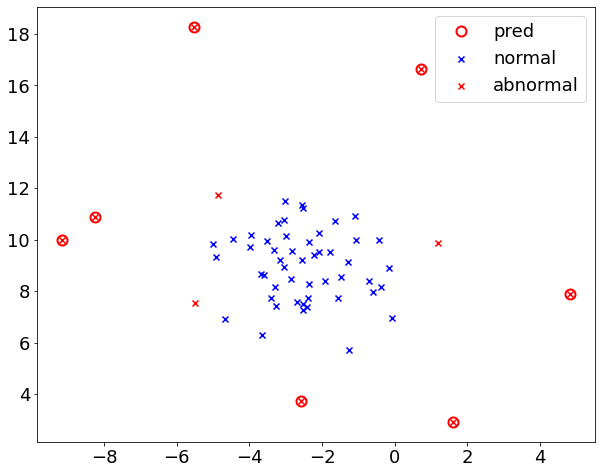

In [26]:
# Visualize the predictions
visualize_preds(X_test, y_test, y_preds_test)

# Exercise: Larger Dataset

Now, we will run the anomaly detection algorithm that you implemented on a more realistic and much harder dataset. In this dataset, each example is described by 10 features.

In [27]:
X_normal, y_normal = make_blobs(
    n_samples=1000,n_features=10,centers=1,cluster_std=1.50,random_state=42)
X_abnormal, y_abnormal = make_blobs(
    n_samples=50,n_features=10,centers=1,cluster_std=5,random_state=42)
y_abnormal = np.ones_like(y_abnormal, dtype=int)
X = np.vstack([X_normal, X_abnormal])
y = np.hstack([y_normal, y_abnormal])

Let's visualize using just the first two features.

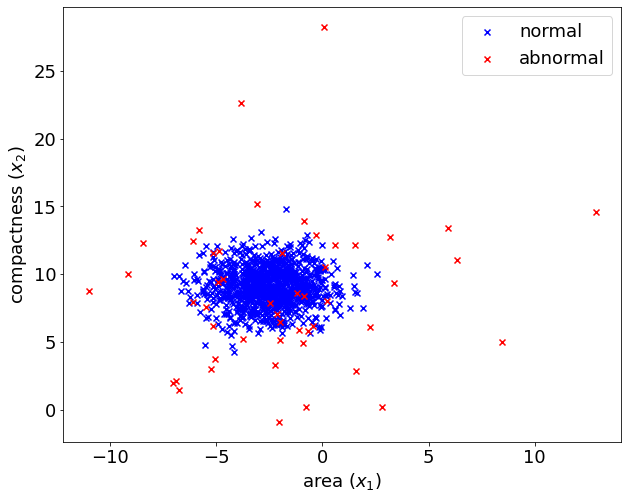

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X[y==0,0], X[y==0,1], c='b', marker="x", label='normal')
ax.scatter(X[y==1,0], X[y==1,1], c='r', marker="x", label='abnormal')
ax.set_xlabel('area ($x_1$)')
ax.set_ylabel('compactness ($x_2$)')
plt.legend()
plt.show()
plt.close('all')

In [29]:
# Split the dataset
# YOUR CODE HERE
# X_train = 
# y_train = 
# X_valid =
# y_valid = 
# X_test = 
# y_test = 
X_train, X_, y_train, y_ = train_test_split(X_normal, y_normal,test_size=0.20, random_state=42)# YOUR CODE HERE
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)# YOUR CODE HERE
X_valid,X_t,y_valid,y_t = train_test_split(X_abnormal,y_abnormal,test_size =0.50,random_state=42)
X_valid = np.vstack([X_cv, X_valid])
y_valid = np.hstack([y_cv, y_valid])
X_test =  np.vstack([X_test,X_t])
y_test =  np.hstack([y_test,y_t])
print(f"Training set: {X_train.shape} {y_train.shape} n_abnormal={np.sum(y_train)}")
print(f"Validation set: {X_valid.shape} {y_valid.shape} n_abnormal={np.sum(y_valid)}")
print(f"Test set: {X_test.shape} {y_test.shape} n_abnormal={np.sum(y_test)}")

Training set: (800, 10) (800,) n_abnormal=0
Validation set: (125, 10) (125,) n_abnormal=25
Test set: (125, 10) (125,) n_abnormal=25


Expected outputs:
```
Training set: (8000, 25) (8000,) n_abnormal=0
Validation set: (1010, 25) (1010,) n_abnormal=10
Test set: (1010, 25) (1010,) n_abnormal=10
```

Next, you need to put together everything you have implemented above in this dataset.
1. Estimate the Gaussian parameters
1. Find the best threshold (i.e., epsilon) using the validation set
1. Evaluate the probabilites for the test set
1. Make predictions on the test set using the best threshold


In [30]:
# YOUR CODE HERE
# Note: please save the best epsilon and best F1 from the validation in 
#       `epsilon` and `F1_valid`.
mu, var = estimate_gaussian(X_train)
p = multivariate_gaussian(X_valid,mu,var)# YOUR CODE HERE
epsilon, F1_valid = select_threshold(y_valid, p)


<ipython-input-20-141c1c9c2ca3>:30: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


In [31]:
print(f'Best epsilon found using validation: {epsilon}')
print(f'Best F1 on Validation Set: {F1_valid}')

Best epsilon found using validation: 5.292241820234481e-10
Best F1 on Validation Set: 0.8474576271186441


Expected outputs:
```
Best epsilon found using validation: 5.292241820234482e-10
Best F1 on Validation Set: 0.8474576271186441
```

Evaluation on the test set.

In [34]:
# YOUR CODE HERE

# Evaluate the probabilites for the test set
p_test = multivariate_gaussian(X_test,mu,var)

# Make predictions on test set
y_preds_test = epsilon > p_test

# Compute performance metrics
acc = np.mean(y_preds_test == y_test)
tp = np.sum((y_preds_test == 1) & (y_test == 1))
fp = np.sum((y_preds_test == 1) & (y_test == 0))
fn = np.sum((y_preds_test == 0) & (y_test == 1))

        
prec = tp/(tp+fp)
rec = tp/(tp+fn)
F1_test = 2*prec*rec/(prec+rec)

In [35]:
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {F1_test:.4f}")

Accuracy: 0.9200
Precision: 0.7143
Recall: 1.0000
F1-Score: 0.8333


Expected outputs:
```
Accuracy: 0.9200
Precision: 0.7143
Recall: 1.0000
F1-Score: 0.8333
```